This notebook is to provide a basic template for doing machine learning in Python

# Step 1: Initialize libraries (through installations or a conda environment)

In [ ]:
# Some recommended libraries
# - scikit-learn: (basic) machine learning
# - tensorflow: (slightly advanced) machine learning
# - matplotlib: graphing
# - seaborn: graphing
# - numpy: generic data structures & arithmetic
# - pandas: dataframes

# Optional but recommended:
# - missingno: NA value visualizations
# - tqdm: progress bars

!pip install matplotlib seaborn numpy pandas scikit-learn

# Step 2: Defining a dataset

The goal of this section is to create some variables: 
- X: inputs to our model (i.e. a range of numbers)
- y: the labels that the model will try to predict (i.e. even or odd)

In [117]:
# Because this is a template notebook, let's make a synthetic dataset
import numpy as np

numbers = [num for num in range(1, 100)]
labels = ["even" if num % 2 == 0 else "odd" for num in numbers]

In [118]:
# Set our inputs and outputs (Note: It's nice to wrap these in np.arrays to allow functions to more easily use them)
X = np.array(numbers)
y = np.array(labels)

# Step 3: Exploratory data analysis (EDA)

Understanding the structure of our data gives us an idea of what models will yield the best accuracies for us.

<Axes: xlabel='number', ylabel='even or odd'>

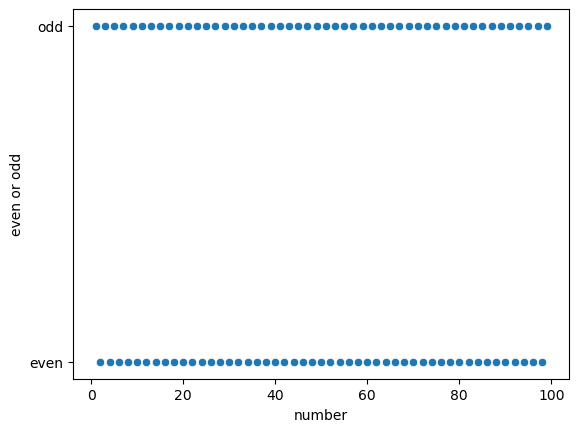

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel("number")
plt.ylabel("even or odd")
sns.scatterplot(x=X, y=y)

# Step 4: Setting up models

Here's some general baseline models people use with scikit-learn

In [120]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

baseline_models = {
    "Dummy": DummyClassifier(strategy="most_frequent"), # Baseline
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classification": SVC(kernel="linear", probability=True, random_state=42)
}

(optional) Tensorflow has good options for neural networks but I'm not very well experienced in this

In [107]:
import tensorflow as tf

neuralnet_model = tf.keras.Sequential()
neuralnet_model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
neuralnet_model.compile(optimizer = tf.keras.optimizers.Adam(1.0), loss = 'mean_squared_error')

print(neuralnet_model.summary())

/home/chengyi/anaconda3/envs/DataSci/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None


# Step 5: Train & evaluate our models

In [121]:
# One last thing we have to do. We have to change our labels into numbers instead of strings so that are model can understand them
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [122]:
# We also have to change the shape of our input
X = np.array(numbers).reshape(-1,1)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Our baseline models are more useful for prediction classes (cases where we have a good amount of data points for each class such as ours)
for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: {score:.3f}")

Dummy: 0.250
Linear Regression: -0.657
Random Forest: 0.000
Support Vector Classification: 0.250


In [ ]:
# (Optional) Neural nets are good at predicting novel information
epochs_hist = neuralnet_model.fit(X_train, y_train, epochs = 200)
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Traning')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()